# Machine Learning e Data Science

# Entrega 01 - Portal  Gov.br

## Professor Diogenes A. R. Justo

A equipe Ômega foi selecionada para participar de um evento competitivo, onde o stakeholder desafiou os participantes a encontrar soluções disruptivas para solucionar sua dor, de **melhorar a experiência do usuário na utilização do portal Gov.br**. Um dos pontos levantados pelo stakeholder é o desejo que até uma pessoa que tenha poucos conhecimentos de informática consigam achar seus conteúdos e aproveitar os recursos do governo, **diminuindo a distância Governo X Cidadão**.



In [95]:
Nome = ['Fabio Akamine','Gabriel Mora','Gustavo Oliveira','Rafaela Almeida' ]
rm = [86294, 84816,85372,84782]
 
#create dataframe using two list days and temperature
Componentes_Equipe_Omega = pd.DataFrame({"NOME":Nome, "rm":RM})
Componentes_Equipe_Omega

,NOME,rm
0,Fabio Akamine,86294
1,Gabriel Mora,84816
2,Gustavo Oliveira,85372
3,Rafaela Almeida,84782


#  Introdução

Este trabalho tem como objetivo agariar informações a respeito das motivações do usuários e seu perfil ao utilizar o portal Gov. 

A base desta análise exploratória foi retirado do site do Fale.BR (Plataforma Integrada de Ouvidoria e Acesso à Informação - https://falabr.cgu.gov.br/publico/DownloadDados/DownloadDadosLai.aspx) e da API de Serviços do Portal de Serviços (https://www.servicos.gov.br/api/v1/docs#/)

Na ausência do acesso a fonte de dados referente ao perfil de acesso ao portal Gov.br, utilizaremos as informações de avaliação dos servicos, do **Portal de Serviços**) e do perfil de usuários que encaminham reclamações ou requisições de informação na **Plataforma Integrada de Ouvidoria e Acesso à Informação**.

Para início de trabalho, fizemos um brainstorm com os principais assuntos/problemas que o portal poderia estar enfrentando, onde o assunto a ser resolvido é a "Baixa aderência ao Portal Gov".

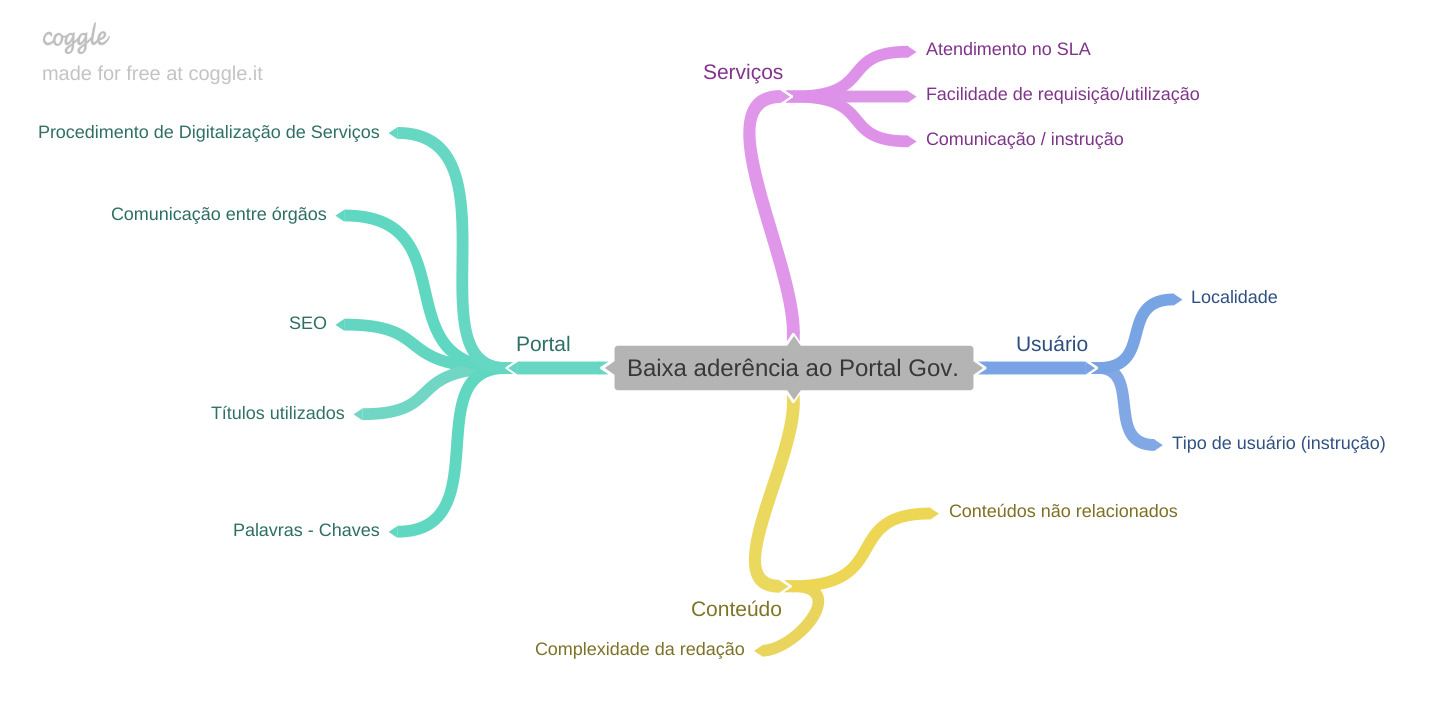

In [9]:
Image("mindmap.png")

##  0.0. Imports

###  0.1. Bibliotecas

In [1]:
import requests
import json
import fsspec
import math
from datetime import datetime
from heatmap import heatmap, corrplot



import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from datetime import date
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.io.json import json_normalize
from IPython.display import Image
from IPython.core.display import HTML

import warnings
warnings.filterwarnings('ignore')


sns.set()



###  0.2. Fonte de dados

In [2]:
#Plataforma Integrada de Ouvidoria e Acesso à Informação - Reclamacao
##Os arquivos do tipo csv passaram inicialmente pelo Notepad++ para que seu encoding fosse "atualizado" para o UTF-8. 
###Foi feito o merge dos arquivos de dicionario, recurso de reclamação e reclamação. 
df_raw_solicitante_reclamacao2020 = pd.read_csv("Reclamacao_2020/20210401_SolicitantesRecursos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_recurso_reclamacao2020 = pd.read_csv("Reclamacao_2020/20210401_Recursos_Reclamacoes_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_recurso_dict_reclamacao2020 = pd.read_csv("Reclamacao_2020/Recursos-Formato.txt", encoding = "ANSI", sep = "-",  skiprows=2 )
df_raw_solicitante_dict_reclamacao2020 = pd.read_csv("Reclamacao_2020/Solicitantes-Formato.txt", encoding = "ANSI", sep = "-",  skiprows=2 )

df = df_raw_solicitante_reclamacao2020.copy()
df_dict = df_raw_solicitante_dict_reclamacao2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_sol_reclama = df.set_axis(coluna_dict, axis=1)
df_sol_reclama.rename(columns=lambda x: x.strip(), inplace=True)

df = df_raw_recurso_reclamacao2020.copy()
df_dict = df_raw_recurso_dict_reclamacao2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_recurso_reclama = df.set_axis(coluna_dict, axis=1)
df_recurso_reclama.rename(columns=lambda x: x.strip(), inplace=True)

df_reclamacoes= pd.merge(df_recurso_reclama, df_sol_reclama , on='IdSolicitante', how='left')
## a extensão Y é referente ao solicitante e x ao orgão do governo


#Plataforma Integrada de Ouvidoria e Acesso à Informação - Pedido Acesso á informação
##Os arquivos do tipo csv passaram inicialmente pelo Notepad++ para que seu encoding fosse "atualizado" para o UTF-8. 
###Foi feito o merge dos arquivos de dicionario, pedido de acesso a informação e de solicitação. . 
df_raw_solicitante_acesso2020 = pd.read_csv("pedido_acesso_info_2020/20210401_SolicitantesPedidos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_pedido_acesso2020 = pd.read_csv("pedido_acesso_info_2020/20210401_Pedidos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_pedido_dict_acesso2020 = pd.read_csv("pedido_acesso_info_2020/Pedidos-Formato.txt", encoding = "ANSI", sep = "-", skiprows=2 )
df_raw_solicitante_dict_acesso2020 = pd.read_csv("pedido_acesso_info_2020/Solicitantes-Formato.txt", encoding = "ANSI", sep = "-", skiprows=2 )

df = df_raw_solicitante_acesso2020.copy()
df_dict = df_raw_solicitante_dict_acesso2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_sol_info = df.set_axis(coluna_dict, axis=1)
df_sol_info.rename(columns=lambda x: x.strip(), inplace=True)

df = df_raw_pedido_acesso2020.copy()
df_dict = df_raw_pedido_dict_acesso2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_pedido_info = df.set_axis(coluna_dict, axis=1)
df_pedido_info.rename(columns=lambda x: x.strip(), inplace=True)

df_pedido_info= pd.merge(df_pedido_info, df_sol_info , on='IdSolicitante', how='left')
## a extensão Y é referente ao solicitante e x ao orgão do governo


#API de Serviços da API Portal de Serviços
url = 'https://www.servicos.gov.br/api/v1/servicos'
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers).json()
df_raw_apiServico = pd.json_normalize(r, record_path =['resposta'])
df_raw_apiServico = pd.DataFrame(df_raw_apiServico)


In [3]:
#Plataforma Integrada de Ouvidoria e Acesso à Informação - Reclamacao
##Os arquivos do tipo csv passaram inicialmente pelo Notepad++ para que seu encoding fosse "atualizado" para o UTF-8. 
###Foi feito o merge dos arquivos de dicionario, recurso de reclamação e reclamação. 
df_raw_solicitante_reclamacao2020 = pd.read_csv("Reclamacao_2020/20210401_SolicitantesRecursos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_recurso_reclamacao2020 = pd.read_csv("Reclamacao_2020/20210401_Recursos_Reclamacoes_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_recurso_dict_reclamacao2020 = pd.read_csv("Reclamacao_2020/Recursos-Formato.txt", encoding = "ANSI", sep = "-",  skiprows=2 )
df_raw_solicitante_dict_reclamacao2020 = pd.read_csv("Reclamacao_2020/Solicitantes-Formato.txt", encoding = "ANSI", sep = "-",  skiprows=2 )

df = df_raw_solicitante_reclamacao2020.copy()
df_dict = df_raw_solicitante_dict_reclamacao2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_sol_reclama = df.set_axis(coluna_dict, axis=1)
df_sol_reclama.rename(columns=lambda x: x.strip(), inplace=True)

df = df_raw_recurso_reclamacao2020.copy()
df_dict = df_raw_recurso_dict_reclamacao2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_recurso_reclama = df.set_axis(coluna_dict, axis=1)
df_recurso_reclama.rename(columns=lambda x: x.strip(), inplace=True)

df_reclamacoes= pd.merge(df_recurso_reclama, df_sol_reclama , on='IdSolicitante', how='left')
## a extensão Y é referente ao solicitante e x ao orgão do governo


#Plataforma Integrada de Ouvidoria e Acesso à Informação - Pedido Acesso á informação
##Os arquivos do tipo csv passaram inicialmente pelo Notepad++ para que seu encoding fosse "atualizado" para o UTF-8. 
###Foi feito o merge dos arquivos de dicionario, pedido de acesso a informação e de solicitação. . 
df_raw_solicitante_acesso2020 = pd.read_csv("pedido_acesso_info_2020/20210401_SolicitantesPedidos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_pedido_acesso2020 = pd.read_csv("pedido_acesso_info_2020/20210401_Pedidos_csv_2020_utf8.txt", sep=";", encoding =  "utf_8", header = None)
df_raw_pedido_dict_acesso2020 = pd.read_csv("pedido_acesso_info_2020/Pedidos-Formato.txt", encoding = "ANSI", sep = "-", skiprows=2 )
df_raw_solicitante_dict_acesso2020 = pd.read_csv("pedido_acesso_info_2020/Solicitantes-Formato.txt", encoding = "ANSI", sep = "-", skiprows=2 )

df = df_raw_solicitante_acesso2020.copy()
df_dict = df_raw_solicitante_dict_acesso2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_sol_info = df.set_axis(coluna_dict, axis=1)
df_sol_info.rename(columns=lambda x: x.strip(), inplace=True)

df = df_raw_pedido_acesso2020.copy()
df_dict = df_raw_pedido_dict_acesso2020.copy()
coluna_dict = df_dict['Unnamed: 1'].tolist()
df_pedido_info = df.set_axis(coluna_dict, axis=1)
df_pedido_info.rename(columns=lambda x: x.strip(), inplace=True)

df_pedido_info= pd.merge(df_pedido_info, df_sol_info , on='IdSolicitante', how='left')
## a extensão Y é referente ao solicitante e x ao orgão do governo


In [4]:
#API de Serviços da API Portal de Serviços
url = 'https://www.servicos.gov.br/api/v1/servicos'
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers).json()
df_raw_apiServico = pd.json_normalize(r, record_path =['resposta'])


##  1.0. Descrição dos Dados

In [7]:
print('O dataset de pedido de informação possui {} linhas'.format(df_pedido_info.shape[0]))
print('O dataset de pedido de reclamações possui {} linhas'.format(df_reclamacoes.shape[0]))
print('O dataset da API de serviços possui {} linhas'.format(df_raw_apiServico.shape[0]))

O dataset de pedido de informação possui 154075 linhas
O dataset de pedido de reclamações possui 18773 linhas
O dataset da API de serviços possui 4270 linhas


In [6]:
df_raw_apiServico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      4318 non-null   object 
 1   nome                                    4318 non-null   object 
 2   sigla                                   3554 non-null   object 
 3   descricao                               4318 non-null   object 
 4   contato                                 4318 non-null   object 
 5   gratuito                                4318 non-null   object 
 6   porcentagemDigital                      4318 non-null   int64  
 7   porcentagemManual                       768 non-null    object 
 8   servicoDigital                          4318 non-null   bool   
 9   linkServicoDigital                      3540 non-null   object 
 10  condicoesAcessibilidade                 4318 non-null   obje

In [7]:
df_pedido_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154075 entries, 0 to 154074
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   IdPedido              154075 non-null  int64 
 1   ProtocoloPedido       154075 non-null  int64 
 2   Esfera                154075 non-null  object
 3   UF_x                  452 non-null     object
 4   Municipio_x           452 non-null     object
 5   OrgaoDestinatario     154075 non-null  object
 6   Situacao              154075 non-null  object
 7   DataRegistro          154075 non-null  object
 8   PrazoAtendimento      154071 non-null  object
 9   FoiProrrogado         154075 non-null  object
 10  FoiReencaminhado      154075 non-null  object
 11  FormaResposta         154075 non-null  object
 12  OrigemSolicitacao     154075 non-null  object
 13  IdSolicitante         154075 non-null  int64 
 14  AssuntoPedido         154025 non-null  object
 15  SubAssuntoPedido 

In [8]:
df_reclamacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18773 entries, 0 to 18772
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdRecurso            18773 non-null  int64  
 1   IdRecursoPrecedente  5732 non-null   float64
 2   IdPedido             18773 non-null  int64  
 3   IdSolicitante        18773 non-null  int64  
 4   ProtocoloPedido      18773 non-null  int64  
 5   Esfera               18773 non-null  object 
 6   UF_x                 9 non-null      object 
 7   Municipio_x          9 non-null      object 
 8   OrgaoDestinatario    18773 non-null  object 
 9   Instancia            18773 non-null  object 
 10  Situacao             18773 non-null  object 
 11  DataRegistro         18773 non-null  object 
 12  PrazoAtendimento     18773 non-null  object 
 13  OrigemSolicitacao    18773 non-null  object 
 14  TipoRecurso          18773 non-null  object 
 15  DataResposta         17476 non-null 

### 1.1. Ajuste de colunas e variáveis

In [9]:
#Plataforma Integrada de Ouvidoria e Acesso à Informação - Pedido Acesso á informação
#Foi selecionado apenas os usuários com identificação

df_info = df_pedido_info.copy()
df_info [ 'identificacao'] =  df_info['IdSolicitante'].apply(lambda x: "anonimo" if x == 0 else 'identificado')
df_info.Profissao.fillna('nao_identificado', inplace=True)
df_info['contagem'] = 1


##Separação do dataset para os usuários identificados
df_usuario_info = df_info.query("identificacao == 'identificado'")
df_info_idade = df_usuario_info.copy()
df_info_idade['DataResposta']= pd.to_datetime(df_info_idade['DataResposta'])
df_info_idade['DataRegistro']= pd.to_datetime(df_info_idade['DataRegistro'])
df_info_idade['sla'] =  df_info_idade.DataResposta - df_info_idade.DataRegistro 

cols_drop = ['IdPedido', 'ProtocoloPedido']
df_info_idade = df_info_idade.drop( cols_drop, axis = 1)

df_info_idade=df_info_idade.dropna(subset = ['DataNascimento'], how = 'all')
data_atual = date.today()
data_em_texto = data_atual.strftime('%d/%m/%Y')
df_info_idade['hoje']= data_em_texto
df_info_idade['hoje']= pd.to_datetime(df_info_idade['hoje'])
df_info_idade['DataNascimento']= pd.to_datetime(df_info_idade['DataNascimento'], errors = 'coerce')
df_info_idade['idade'] =(df_info_idade['hoje'].dt.year - df_info_idade['DataNascimento'].dt.year)
df_info_idade=df_info_idade.dropna(subset = ['idade'], how = 'all')
df_info_idade['idade'] = df_info_idade['idade'].round().astype(int)
df_info_idade['range_idade'] = df_info_idade['idade'].apply(lambda x: '0-16' if x < 16 else '16-25' if x<25 else '25-40' if x <40 else '40-60' if x<60 else '>60')
df_info_idade['mes'] = df_info_idade['DataRegistro'].dt.month


#Plataforma Integrada de Ouvidoria e Acesso à Informação - Pedido Acesso á informação
#Foi selecionado apenas os usuários com identificação
df_reclama = df_reclamacoes.copy()
df_reclama [ 'identificacao'] =  df_reclama['IdSolicitante'].apply(lambda x: "anonimo" if x == 0 else 'identificado')
df_reclama.Profissao.fillna('nao_identificado', inplace=True)
df_reclama['contagem'] = 1


##Separação do dataset para os usuários identificados
df_usuário_reclama = df_reclama.query("identificacao == 'identificado'")
df_reclama_idade = df_usuário_reclama.copy()
df_reclama_idade['DataResposta']= pd.to_datetime(df_reclama['DataResposta'])
df_reclama_idade['DataRegistro']= pd.to_datetime(df_reclama['DataRegistro'])
df_reclama_idade['sla'] =  df_reclama_idade.DataResposta - df_reclama_idade.DataRegistro 

cols_drop = ['IdPedido', 'ProtocoloPedido']
df_reclama_idade = df_reclama_idade.drop( cols_drop, axis = 1)

df_reclama_idade=df_reclama_idade.dropna(subset = ['DataNascimento'], how = 'all')
data_atual = date.today()
data_em_texto = data_atual.strftime('%d/%m/%Y')
df_reclama_idade['hoje']= data_em_texto
df_reclama_idade['hoje']= pd.to_datetime(df_reclama_idade['hoje'])
df_reclama_idade['DataNascimento']= pd.to_datetime(df_reclama_idade['DataNascimento'], errors = 'coerce')
df_reclama_idade['idade'] =(df_reclama_idade['hoje'].dt.year - df_reclama_idade['DataNascimento'].dt.year)
df_reclama_idade=df_reclama_idade.dropna(subset = ['idade'], how = 'all')
df_reclama_idade['idade'] = df_reclama_idade['idade'].round().astype(int)
df_reclama_idade['range_idade'] = df_reclama_idade['idade'].apply(lambda x: '0-16' if x < 16 else '16-25' if x<25 else '25-40' if x <40 else '40-60' if x<60 else '>60')
df_reclama_idade['mes'] = df_reclama_idade['DataRegistro'].dt.month


## 2.0. Análise Qualidade dos Dados


### 2.1. Análise dos Usuários Anônimos

Dos dados do portal de acesso à informação, observamos que **a maioria dos usuários se identificaram** e que os 5 principais órgão acessados por estes usuários são **MCIDADANIA - Ministério da Cidadania (Desenvolvimento Social e Esporte), ME - Ministério da Economia, CEF – Caixa Econômica Federal, INSS – Instituto Nacional do Seguro Social, MS – Ministério da Saúde, PETROBRAS – Petróleo Brasileiro S.A.**. É válido indicar que houve uma **ENORME** procura pelo **MCIDADANIA - Ministério da Cidadania (Desenvolvimento Social e Esporte)** no período de 2020. 

São 122510 usuários do anônimos e 31565 usuários identificados
Os TOP 5 órgãos mais requisitados são MCIDADANIA - Ministério da Cidadania (Desenvolvimento Social e Esporte), ME - Ministério da Economia, CEF – Caixa Econômica Federal, INSS – Instituto Nacional do Seguro Social, MS – Ministério da Saúde, PETROBRAS – Petróleo Brasileiro S.A.


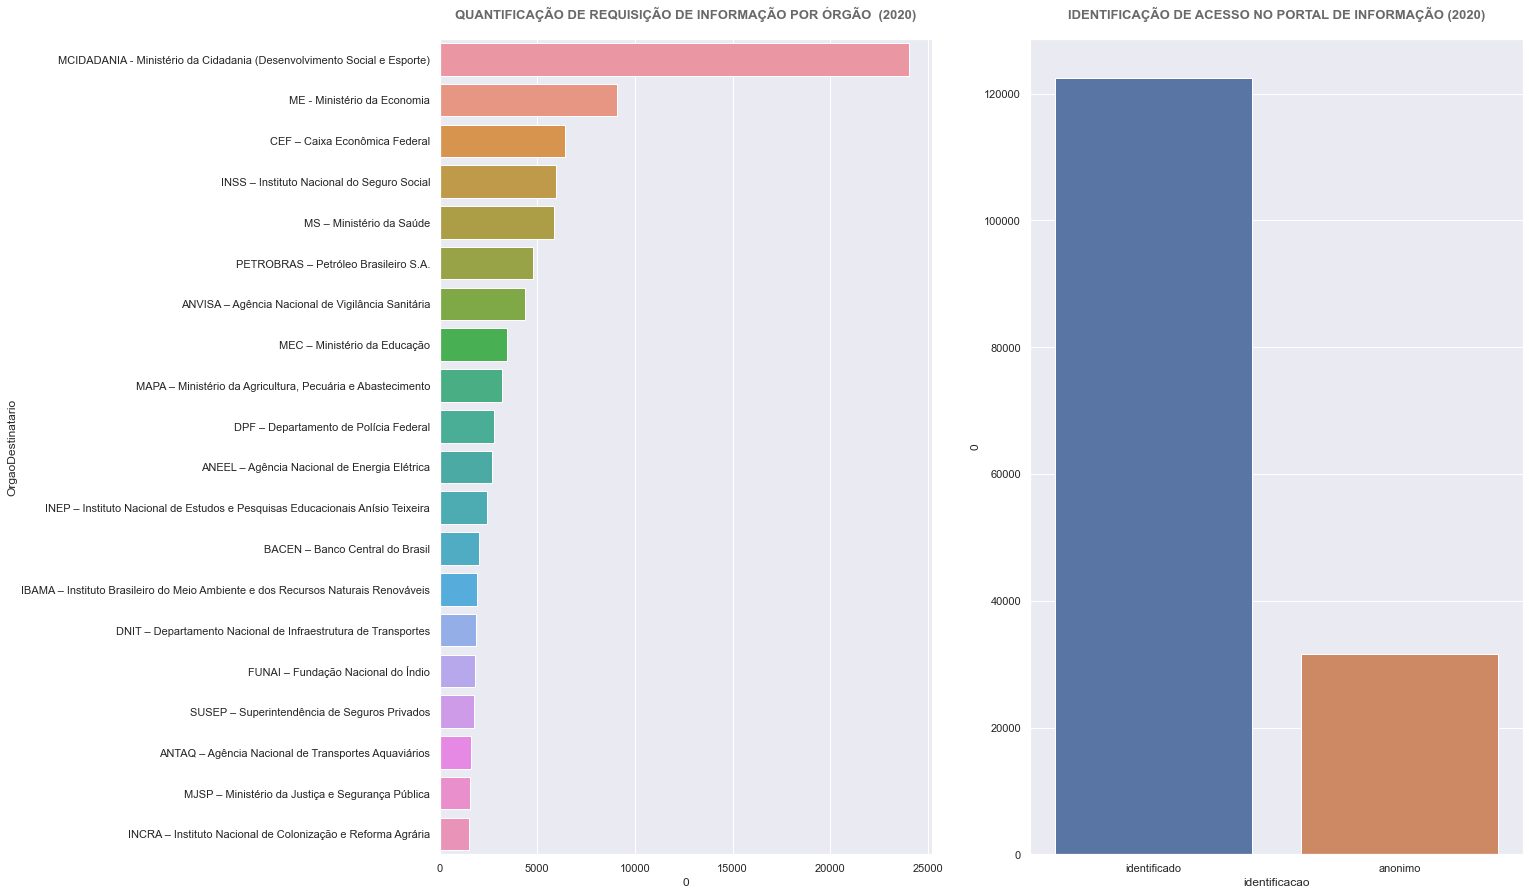

In [10]:
# Identificado que a maioria dos usuários do portal de informação se identificaram, sendo a distribuição e do gênero maculino e feminino bem próximos. 
identifica       = df_info[['identificacao']].value_counts().sort_values(ascending= False). reset_index()
genero           = df_info[['Genero']].value_counts().sort_values(ascending= False). reset_index()
orgao            = df_info[['OrgaoDestinatario']].value_counts().sort_values(ascending= False).head(20).reset_index()

print('São {} usuários do anônimos e {} usuários identificados'.format(identifica[0][0], identifica[0][1] ))
print('Os TOP 5 órgãos mais requisitados são {}, {}, {}, {}, {}, {}'.format(orgao['OrgaoDestinatario'][0], orgao['OrgaoDestinatario'][1], orgao['OrgaoDestinatario'][2], orgao['OrgaoDestinatario'][3], orgao['OrgaoDestinatario'][4], orgao['OrgaoDestinatario'][5] ))

plt.figure(figsize=(30,15))

plt.subplot(1,3,2)
sns.barplot(x='identificacao' , y=0 , data = identifica, orient = 'v')
plt.title('IDENTIFICAÇÃO DE ACESSO NO PORTAL DE INFORMAÇÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');


plt.subplot(1,3,1)
sns.barplot(x= 0, y= 'OrgaoDestinatario' , data = orgao, orient = 'h')
plt.title('QUANTIFICAÇÃO DE REQUISIÇÃO DE INFORMAÇÃO POR ÓRGÃO  (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');






### 2.2. Analise dos Usuários Identificados


Dos usuários identificados no portal de informação, observamos que a **maioria dos usuários possuem mais que 25 anos de idade**, sendo a grande massa de usuários possuírem entra **25 e 40 anos de idade**. Há uma maior quantidade de acesso por parte do gênero masculino, porém interessante de se observar que na faixa entre os 16 anos  e 25 anos, há uma maioria do gênero feminino requisitando infomações. 
Interessante observar também o grande acesso da ferramenta parte **de usuários com maior formação educacional com o (Ensino Superior Completo)** 
Houve um grande crescimento na procura por informações no período de  Abril, possívelmente ao período que fora decretado o estado pandêmico no Brasil. Ao logo de 2020, **o tema mais procurado foi a respeito de informações sobre COVID**. 

In [11]:
#  Analisando a idade dos usuários mais novo e o mais velho do serviço do canal de informação
print('O usuário mais novo cadastrado tem {} anos e o mais velho {} anos '.format(df_info_idade['idade'].min(), df_reclama_idade['idade'].max() ))
print('A média de idade é de {} anos'.format(df_info_idade['idade'].mean()))
print('A mediana das idades é de {} anos'.format(df_info_idade['idade'].median()))

print('Existem {} cadastros de pessoas com < 15 anos'.format(df_info_idade[['idade']][df_info_idade['idade']<15].value_counts().sum()))
print('Existem {} cadastros de pessoas com > 85 anos'.format(df_info_idade[['idade']][df_info_idade['idade']>85].value_counts().sum()))

O usuário mais novo cadastrado tem -5 anos e o mais velho 105 anos 
A média de idade é de 38.32664671465933 anos
A mediana das idades é de 36.0 anos
Existem 67 cadastros de pessoas com < 15 anos
Existem 266 cadastros de pessoas com > 85 anos


In [12]:
#Avaliando as idades inferiores a 15 anos 
print(df_info_idade[['IdSolicitante', 'idade','DataNascimento']][df_info_idade['idade']>85].value_counts().sort_values())

#Avaliando as idades  superior a 85
print(df_info_idade[['IdSolicitante', 'idade','DataNascimento']][df_info_idade['idade']<15].value_counts().sort_values())

IdSolicitante  idade  DataNascimento
3116515        86     1935-07-07          1
3695902        86     1935-04-19          1
3687248        226    1795-02-08          1
3607525        99     1922-09-25          1
3584550        88     1933-10-06          1
                                       ... 
1781884        90     1931-03-11          2
3174123        90     1931-03-14          3
2953913        88     1933-11-12          7
2889271        90     1931-11-22         10
2707676        99     1922-01-25        119
Length: 126, dtype: int64
IdSolicitante  idade  DataNascimento
3128287         3     2018-05-27         1
3145247         10    2011-11-14         1
3474956         1     2020-01-20         1
3829144         1     2020-08-19         1
3807439         4     2017-06-28         1
3802405         1     2020-10-24         1
3794703         1     2020-09-29         1
3784620         1     2020-08-20         1
3656622         1     2020-10-05         1
3655421         1     2020-01

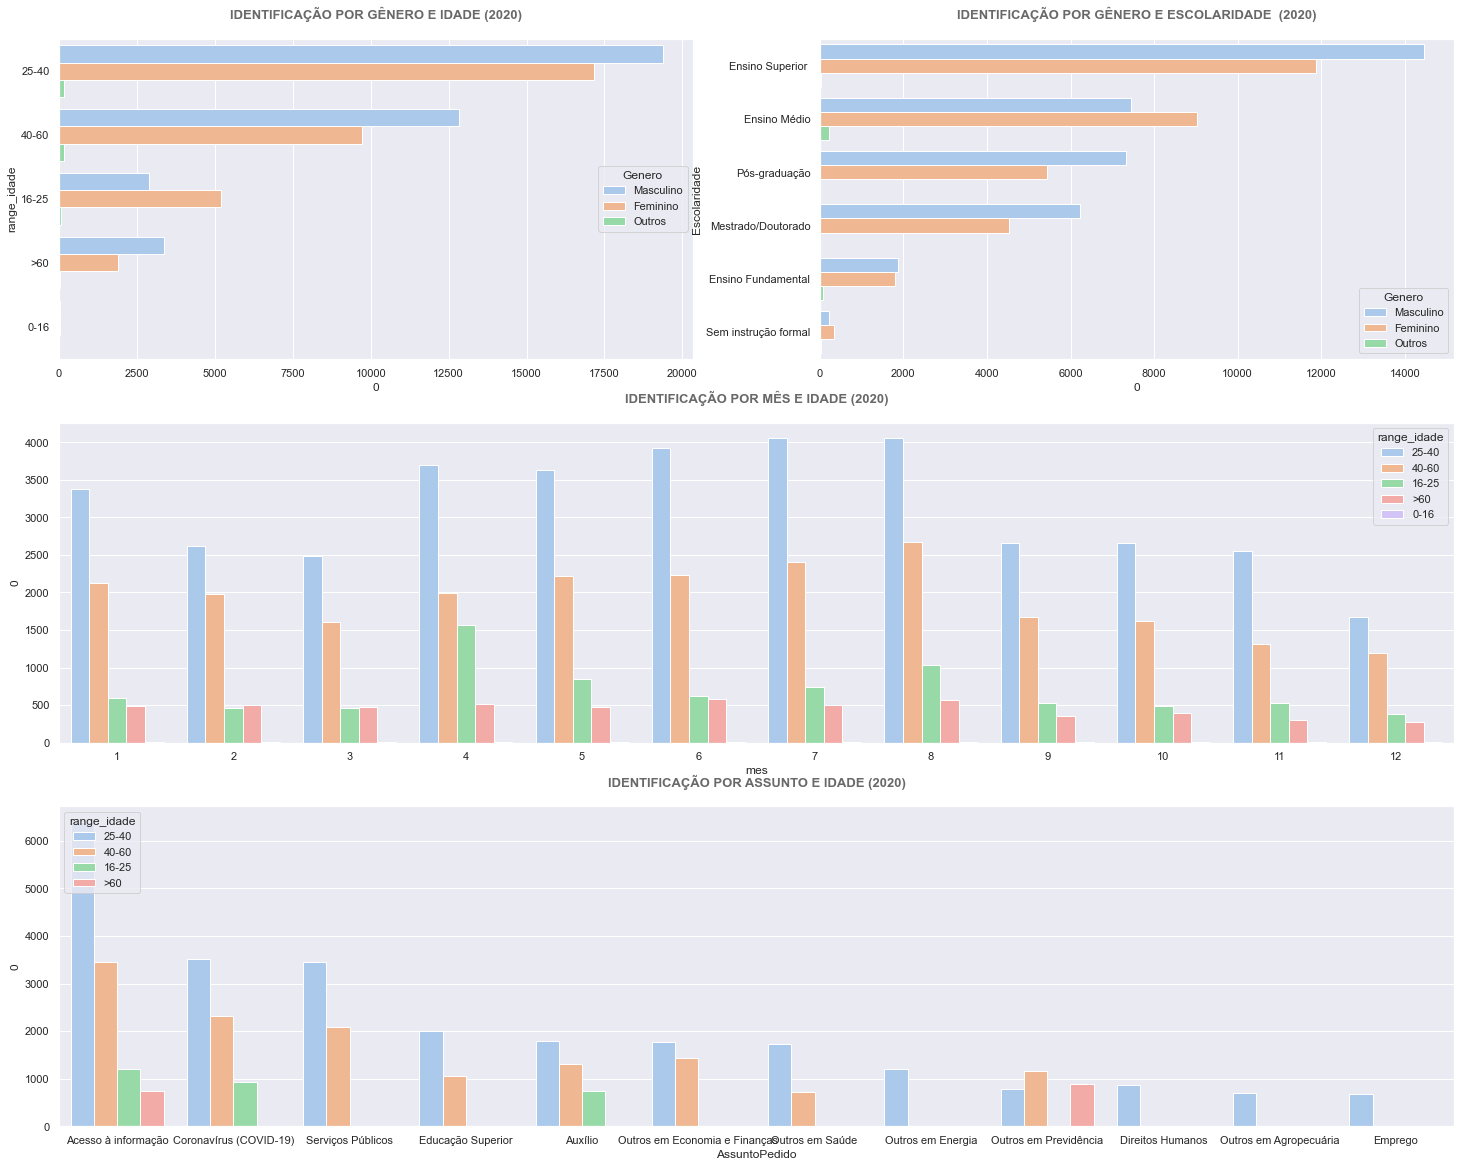

In [13]:
#Agrupamento dos usuários identificados no portal de informação por genero e range de idade
generoXidade        = df_info_idade[['Genero','range_idade']].value_counts().sort_values(ascending= False). reset_index()

#Agrupamento dos usuários identificados no portal de informação por Escolaridade e genero
escolaridadeXgenero = df_info_idade[['Escolaridade',  'Genero']].value_counts().sort_values(ascending= False). reset_index()

#Agrupamento dos usuários identificados no portal de informação por mes e range de idade
idadeXmes = df_info_idade[['mes',  'range_idade']].value_counts().sort_values(ascending= False). reset_index()

#Agrupamento dos usuários identificados no portal de informação por Assunto e range de idade
assuntoXidade        = df_info_idade[['AssuntoPedido','range_idade']].value_counts().sort_values(ascending= False). reset_index().head(25)


plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.barplot(x=0 , y='range_idade' , hue = 'Genero', data = generoXidade, orient = 'h',  palette="pastel")
plt.title('IDENTIFICAÇÃO POR GÊNERO E IDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(3,2,2)
sns.barplot(x=0 , y='Escolaridade' , hue = 'Genero', data = escolaridadeXgenero, orient = 'h',  palette="pastel")
plt.title('IDENTIFICAÇÃO POR GÊNERO E ESCOLARIDADE  (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(3,1,2)
sns.barplot(x='mes' , y=0 , hue = 'range_idade', data = idadeXmes, orient = 'v',  palette="pastel")
plt.title('IDENTIFICAÇÃO POR MÊS E IDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(3,1,3)
sns.barplot(x='AssuntoPedido', y=0 , hue = 'range_idade', data = assuntoXidade, orient = 'v',  palette="pastel")
plt.title('IDENTIFICAÇÃO POR ASSUNTO E IDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');


**O que fazem aqueles que buscam informação?**

Dos usuários identificados, observamos que a maioria dos usuários são majoritariamente pessoas físicas e provenientes de grandes capitais, tal como São Paulo, Rio de Janeiro e Belo Horizonte. O mais interessante é observar que a maior quantidade de acesso é realizado por usuários de Brasília. Seria este um indicador de que quão mais próximo do poder federal, maior é a divulgação do portal ou a familiaridade/facilidade de se utilizar o portal para demandar/questionar os órgãos públicos?

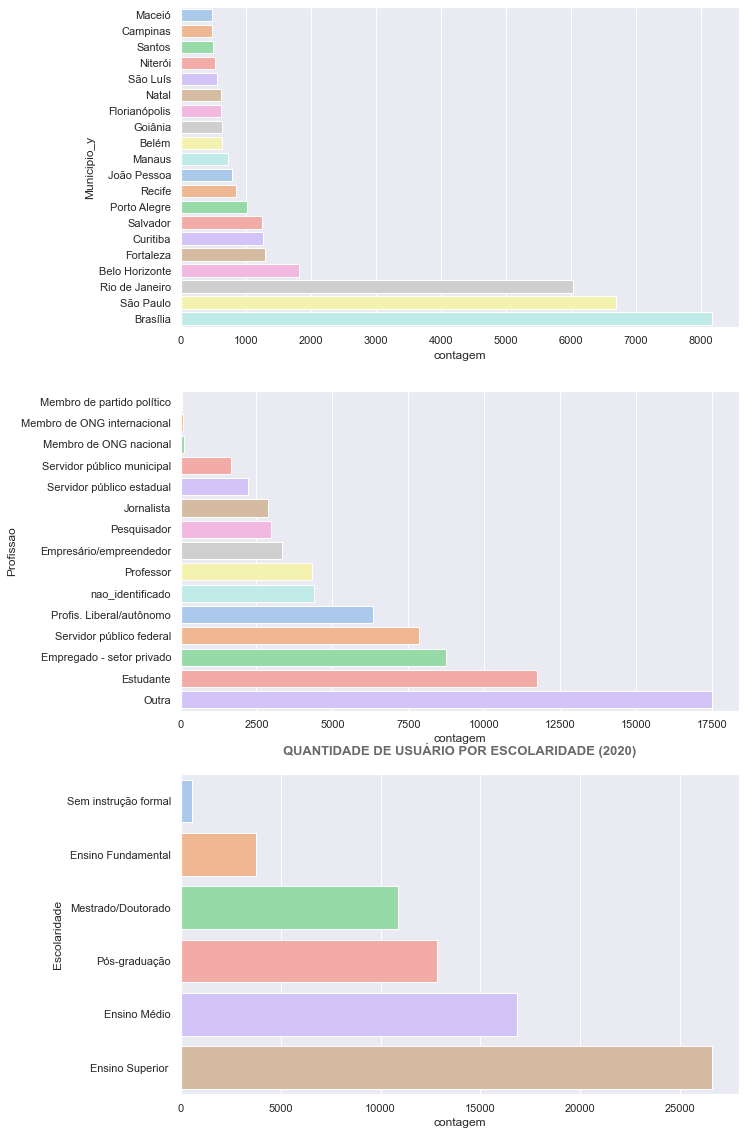

In [14]:
#Agrupamento dos usuários identificados no portal de informação por localidade
localidade = df_info_idade.groupby(['Municipio_y']).sum().reset_index()

#Agrupamento dos usuários identificados no portal de informação por profissão
profissao = df_info_idade.groupby(['Profissao']).sum().reset_index()

#Agrupamento dos usuários identificados no portal de informação por escolaridade
escolaridade = df_info_idade.groupby(['Escolaridade']).sum().reset_index()


fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10, 20))
sns.barplot(data=localidade, x='contagem', y ='Municipio_y', order=localidade.sort_values('contagem').tail(20).Municipio_y,  palette="pastel" ,  ax=ax1)
plt.title('QUANTIDADE DE USUÁRIO POR CIDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

sns.barplot(x="contagem", y="Profissao",order=profissao.sort_values('contagem').tail(15).Profissao,  palette="pastel", data=profissao,  ax=ax2)
plt.title('QUANTIDADE DE USUÁRIO POR PROFISSÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

sns.barplot(x = 'contagem', y = 'Escolaridade',  palette="pastel" , data = escolaridade, order=escolaridade.sort_values('contagem').tail(15).Escolaridade, ax=ax3)
plt.title('QUANTIDADE DE USUÁRIO POR ESCOLARIDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

### 2.3. Analise dos Órgãos e Assuntos abordados


Da amostragem dos usuários identificados, de modo geral, observamos que **os principais tópicos abordados são requisições por Acesso à informação, COVID-19, Serviços Públicos e Outros em Economia e Finanças**, entretanto, quando fazemos uma quebra destes assuntos por órgão governamental, verificamos que **os assuntos dominantes são questionamentos a respeito da COVID-19 e Auxílio no Ministério da Cidadania e "Outras em Previdência" no INSS**, refletindo a preocupação dos usuários em referência a COVID e seus efeitos na saúde e economia.  

Outras observações interessantes a respeito do dataset é a maior interação entre **usuários que possuem apenas o ensino fundamental com o Ministério da Cidadania (Desenvolvimento Social e Esporte) e quando se quebra os usuários por idade, vemos que o range de idade é entre 16 e 25 anos de idade** e **possuem como principais assuntos Auxílio e COVID-19** . Outro ponto interessante é que **grande parte de interação com vários órgãos provém de usuários com o ensino superior** e que **usuários com mais de 60 possuem maior interação com o INSS e o Ministério da Economia**.

In [15]:
assunto = df_info_idade[['AssuntoPedido']].value_counts().sort_values(ascending= False). reset_index()
assunto.head(10)

,AssuntoPedido,0
0,Acesso à informação,11813
1,Coronavírus (COVID-19),7157
2,Serviços Públicos,6719
3,Outros em Economia e Finanças,4035
4,Auxílio,4023
5,Educação Superior,3544
6,Outros em Previdência,2962
7,Outros em Saúde,2945
8,Direitos Humanos,1789
9,Outros em Energia,1780


In [16]:
assunto_orgao = df_info_idade[['AssuntoPedido','OrgaoDestinatario']].value_counts().sort_values(ascending= False). reset_index()
assunto_orgao.head(10)

,AssuntoPedido,OrgaoDestinatario,0
0,Coronavírus (COVID-19),MCIDADANIA - Ministério da Cidadania (Desenvol...,4623
1,Auxílio,MCIDADANIA - Ministério da Cidadania (Desenvol...,3668
2,Outros em Previdência,INSS – Instituto Nacional do Seguro Social,2884
3,Serviços Públicos,ME - Ministério da Economia,2143
4,Outros em Saúde,MS – Ministério da Saúde,1995
5,Coronavírus (COVID-19),CEF – Caixa Econômica Federal,1573
6,Outros em Energia,PETROBRAS – Petróleo Brasileiro S.A.,1250
7,Outros em Agropecuária,"MAPA – Ministério da Agricultura, Pecuária e A...",1186
8,Outros em Economia e Finanças,SUSEP – Superintendência de Seguros Privados,1079
9,Educação Básica,INEP – Instituto Nacional de Estudos e Pesquis...,1041


In [17]:
#Agrupamento dos usuários identificados no portal por órgão, assunto, onde os usuários possuem uma idade superior a 25 anos 
assunto_orgao_idade  = df_info_idade[['AssuntoPedido', 'OrgaoDestinatario','range_idade']].value_counts().sort_values(ascending= False). reset_index()
assunto_orgao_idade.head(40)

,AssuntoPedido,OrgaoDestinatario,range_idade,0
0,Coronavírus (COVID-19),MCIDADANIA - Ministério da Cidadania (Desenvol...,25-40,2272
1,Auxílio,MCIDADANIA - Ministério da Cidadania (Desenvol...,25-40,1654
2,Coronavírus (COVID-19),MCIDADANIA - Ministério da Cidadania (Desenvol...,40-60,1530
3,Auxílio,MCIDADANIA - Ministério da Cidadania (Desenvol...,40-60,1219
4,Outros em Saúde,MS – Ministério da Saúde,25-40,1164
5,Outros em Previdência,INSS – Instituto Nacional do Seguro Social,40-60,1135
6,Serviços Públicos,ME - Ministério da Economia,25-40,1068
7,Outros em Energia,PETROBRAS – Petróleo Brasileiro S.A.,25-40,869
8,Outros em Previdência,INSS – Instituto Nacional do Seguro Social,>60,868
9,Outros em Previdência,INSS – Instituto Nacional do Seguro Social,25-40,758


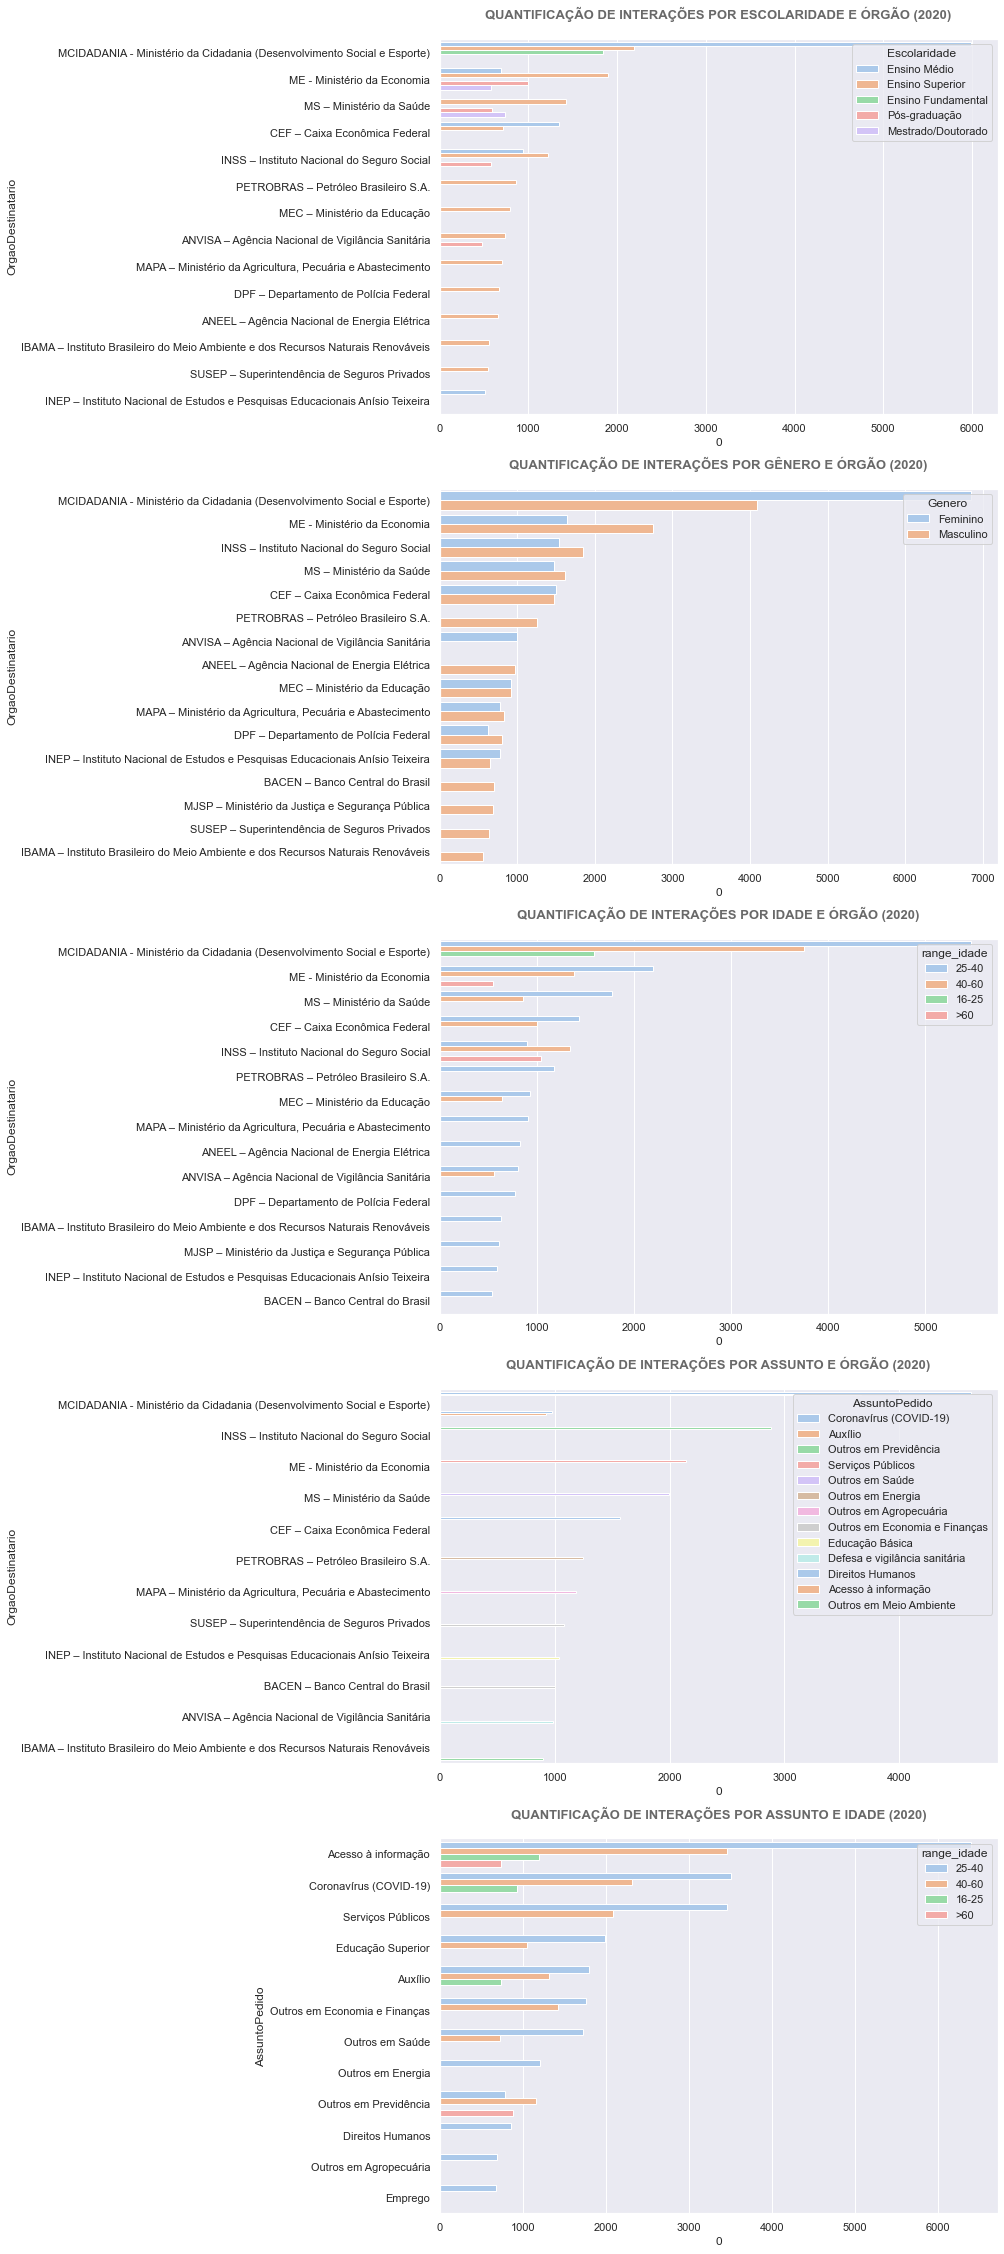

In [18]:
#Agrupamento dos usuários identificados no portal de informação por órgão e genero
orgaoXgenero        = df_info_idade[['OrgaoDestinatario','Genero']].value_counts().sort_values(ascending= False). reset_index().head(25)

#Agrupamento dos usuários identificados no portal de informação por órgão e escolaridade
orgaoXescolaridade  = df_info_idade[['OrgaoDestinatario',  'Escolaridade']].value_counts().sort_values(ascending= False). reset_index().head(25)

#Agrupamento dos usuários identificados no portal de informação por órgão e range de idade
orgaoXidade         = df_info_idade[['OrgaoDestinatario','range_idade']].value_counts().sort_values(ascending= False). reset_index().head(25)

#Agrupamento dos usuários identificados no portal de informação por Assunto e range de idade
assuntoXidade       = df_info_idade[['AssuntoPedido','range_idade']].value_counts().sort_values(ascending= False). reset_index().head(25)

#Agrupamento dos usuários identificados no portal de informação por órgão e range de idade
orgaoXassunto       = df_info_idade[['OrgaoDestinatario','AssuntoPedido']].value_counts().sort_values(ascending= False). reset_index().head(15)



plt.figure(figsize=(10,40))

plt.subplot(5,1,1)
sns.barplot(x=0 , y='OrgaoDestinatario' , hue = 'Escolaridade', data = orgaoXescolaridade, orient = 'h',  palette="pastel");
plt.title('QUANTIFICAÇÃO DE INTERAÇÕES POR ESCOLARIDADE E ÓRGÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(5,1,2)
sns.barplot(x=0 , y='OrgaoDestinatario' , hue = 'Genero', data = orgaoXgenero, orient = 'h',  palette="pastel");
plt.title('QUANTIFICAÇÃO DE INTERAÇÕES POR GÊNERO E ÓRGÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(5,1,3)
sns.barplot(x=0 , y='OrgaoDestinatario' , hue = 'range_idade', data = orgaoXidade, orient = 'h',  palette="pastel");
plt.title('QUANTIFICAÇÃO DE INTERAÇÕES POR IDADE E ÓRGÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(5,1,4)
sns.barplot(x=0 , y='OrgaoDestinatario' , hue = 'AssuntoPedido', data = orgaoXassunto, orient = 'h',  palette="pastel");
plt.title('QUANTIFICAÇÃO DE INTERAÇÕES POR ASSUNTO E ÓRGÃO (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');

plt.subplot(5,1,5)
sns.barplot(x=0 , y='AssuntoPedido' , hue = 'range_idade', data = assuntoXidade, orient = 'h',  palette="pastel");
plt.title('QUANTIFICAÇÃO DE INTERAÇÕES POR ASSUNTO E IDADE (2020)', pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold');


## 3.0. Analise do Portal Gov

### 3.1. Analise de Palavras Chaves API de Servicos

Utilizando as informações retiradas da API de Servicos, fizemos uma rápida análise das palavras chaves utilizadas para identificação das páginas criadas e disponibilizadas no portal gov. Nesta busca, encontramos uma grande quantidade de palavras chaves únicas, porém muitas das palavras são de grau mais técnico, o que pode dificultadr o motor de busca (SEO). 

In [89]:
palavra = []
for d  in df_raw_apiServico['palavrasChave.item']:
    for valor in d:
        print(valor.get('item'))
        item=valor.get('item')
        identidade=valor.get('id')
        palavra.append(item)
        
palavra_chaves= pd.DataFrame(palavra)
#palavra_chaves = palavra_chaves[::2].reset_index(drop = True)
palavra_chaves = palavra_chaves.set_axis(["palavra"], axis=1)

df1 = (palavra_chaves['palavra']
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))

a = df1.query('count==1')

a.dropna(subset=['vals'], axis=0, inplace = True)

all_summary = " ".join(s for s in a['vals'])

stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all_summary)

    
     

Antraz
Bioterrorismo
Carbúnculo Hemático
Diagnóstico
Vigilância virológica
PCR
Sorologia
IGM
IgG
Isolamento viral.
Diagnóstico
Vigilância virológica
PCR
Sorologia
IGM
IgG
Isolamento viral
Vistas
Cópias
Processos Eletrônicos
Multas
Caramujo
Molusco
Barriga d'água
Xistose
Esquistossomose
Verme
Verminose
Febre do caramujo
Bilharzíaze
Doença tropical
Doença negligenciada
Schistosoma
Esquistossomo
Schistosoma mansoni
Shistosoma americanum
Caramujo; Biomphalaria; exposição à luz; técn
Diarreia
Gastreenterite
Rotavírus
Gastroenterite
Rotaviroses
Hantavirose
Hantavírus
Rickettsioses
Bartoneloses
Febre Q.
Arenaviroses
Diagnóstico
Vigilância virológica
PCR
Sorologia
IGM
IgG
Isolamento viral
Hepatites
Anti-HDV igG(total)
anti-HDV igM
HDV-RNA
Rato
Urina de rato
Roedores
Urina de roedores
Enchentes
Mansoni
Schistosoma mansoni
Caracol
Cercária
Trematódeo
Biomphalaria
Esquistossomose
Hospedeiro intermediário
Caramujo
Xistose
Barriga d´água
Esquistossome
Diagnóstico
área endêmica
Xistose
Lagoa da coce

TypeError: 'float' object is not iterable

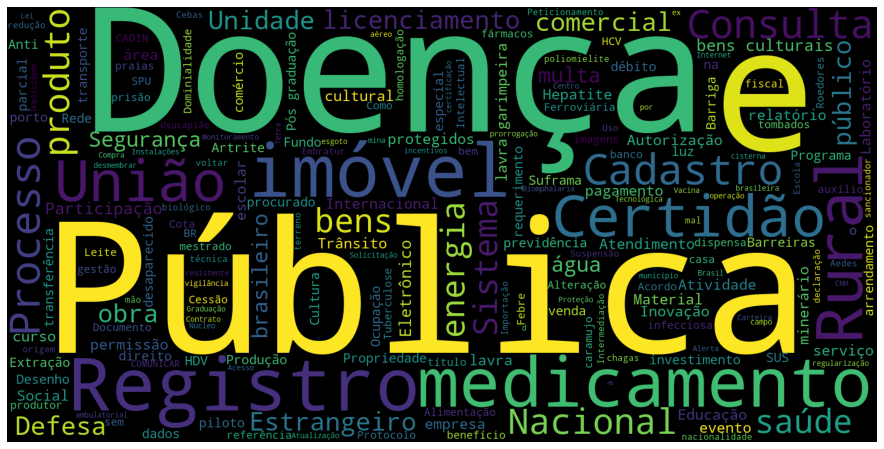

In [98]:
palavra_chaves= pd.DataFrame(palavra)
#palavra_chaves = palavra_chaves[::2].reset_index(drop = True)
palavra_chaves = palavra_chaves.set_axis(["palavra"], axis=1)

df1 = (palavra_chaves['palavra']
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))

a = df1.query('count==1')

a.dropna(subset=['vals'], axis=0, inplace = True)

all_summary = " ".join(s for s in a['vals'])

stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "para", ])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)      